In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [3]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to add a channel dimension (grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 classes
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [5]:
# Create and train the model without data augmentation
model_no_aug = create_cnn_model()

history_no_aug = model_no_aug.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=2
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8024 - loss: 0.5513 - val_accuracy: 0.8669 - val_loss: 0.3683
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8660 - loss: 0.3705 - val_accuracy: 0.8858 - val_loss: 0.3157
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8820 - loss: 0.3232 - val_accuracy: 0.8919 - val_loss: 0.2894
Epoch 4/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8946 - loss: 0.2932 - val_accuracy: 0.8998 - val_loss: 0.2746
Epoch 5/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8999 - loss: 0.2739 - val_accuracy: 0.9015 - val_loss: 0.2659
Epoch 6/10
1875/1875 - 5s - 2ms/step - accuracy: 0.9057 - loss: 0.2544 - val_accuracy: 0.9090 - val_loss: 0.2637
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9108 - loss: 0.2381 - val_accuracy: 0.9095 - val_loss: 0.2542
Epoch 8/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9166 - loss: 0.2236 - val_accuracy: 0.9100 - val_loss: 0.2556
Epoch 9/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9204 - loss: 0.2146 - val_accuracy: 0.9131 -

In [6]:
# Define the ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range=20,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2]
)

# Fit the generator to the training data
datagen.fit(x_train)

# Create and train the model with data augmentation
model_with_aug = create_cnn_model()

history_with_aug = model_with_aug.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=2
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 - 32s - 17ms/step - accuracy: 0.0991 - loss: 2.3020 - val_accuracy: 0.1670 - val_loss: 5.5782
Epoch 2/10
1875/1875 - 30s - 16ms/step - accuracy: 0.0995 - loss: 2.3018 - val_accuracy: 0.1179 - val_loss: 7.6543
Epoch 3/10
1875/1875 - 28s - 15ms/step - accuracy: 0.1001 - loss: 2.3018 - val_accuracy: 0.1694 - val_loss: 9.5638
Epoch 4/10
1875/1875 - 28s - 15ms/step - accuracy: 0.0978 - loss: 2.3018 - val_accuracy: 0.1784 - val_loss: 7.4604
Epoch 5/10
1875/1875 - 41s - 22ms/step - accuracy: 0.0994 - loss: 2.3017 - val_accuracy: 0.1923 - val_loss: 2.1816
Epoch 6/10
1875/1875 - 42s - 23ms/step - accuracy: 0.1013 - loss: 2.3013 - val_accuracy: 0.1894 - val_loss: 5.3066
Epoch 7/10
1875/1875 - 29s - 16ms/step - accuracy: 0.1007 - loss: 2.3015 - val_accuracy: 0.1898 - val_loss: 5.1690
Epoch 8/10
1875/1875 - 29s - 15ms/step - accuracy: 0.0988 - loss: 2.3014 - val_accuracy: 0.2252 - val_loss: 2.2129
Epoch 9/10
1875/1875 - 29s - 15ms/step - accuracy: 0.0997 - loss: 2.3013 - val_accuracy: 0.

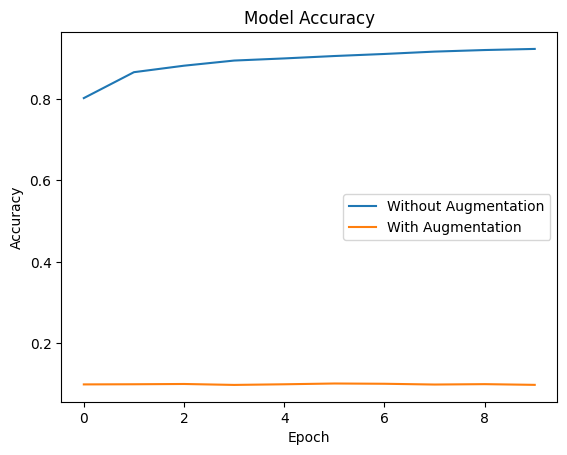

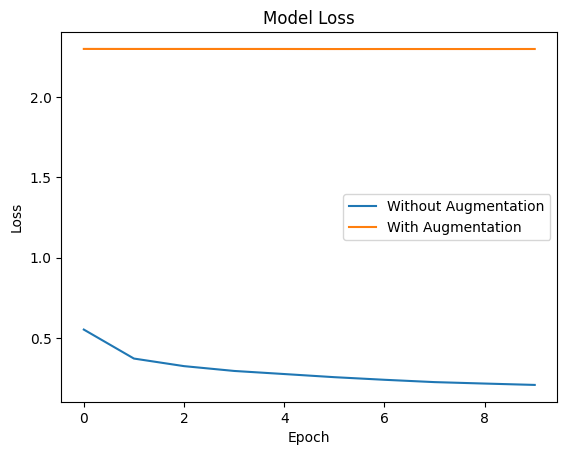

In [7]:
import matplotlib.pyplot as plt
# Plot accuracy comparison
plt.plot(history_no_aug.history['accuracy'], label='Without Augmentation')
plt.plot(history_with_aug.history['accuracy'], label='With Augmentation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss comparison
plt.plot(history_no_aug.history['loss'], label='Without Augmentation')
plt.plot(history_with_aug.history['loss'], label='With Augmentation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [8]:
# Evaluate models on the test set
test_loss_no_aug, test_acc_no_aug = model_no_aug.evaluate(x_test, y_test, verbose=0)
test_loss_with_aug, test_acc_with_aug = model_with_aug.evaluate(x_test, y_test, verbose=0)

print(f"Without Augmentation - Test Accuracy: {test_acc_no_aug:.4f}, Test Loss: {test_loss_no_aug:.4f}")
print(f"With Augmentation    - Test Accuracy: {test_acc_with_aug:.4f}, Test Loss: {test_loss_with_aug:.4f}")


Without Augmentation - Test Accuracy: 0.9076, Test Loss: 0.2556
With Augmentation    - Test Accuracy: 0.1845, Test Loss: 2.3678


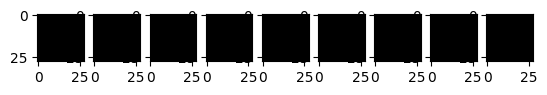

In [23]:
# Display some augmented images
augmented_images, _ = next(datagen.flow(x_train, y_train, batch_size=9))
for i in range(9):
    plt.subplot(1, 9, i + 1)
    plt.imshow(augmented_images[i].reshape(28, 28), cmap='gray')
    plt.axis('on')
plt.show()
